In [46]:
#Import the libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


from pathlib import Path

In [47]:
# List of tickers
tickers = ['AMZN', 'AAPL', 'VALE']

# Dictionary to store DataFrames
stock_data = {}

# Loop through each ticker and read the corresponding CSV file
for ticker in tickers:
    ticker_path = Path(f"../Resources/{ticker}.csv")
    stock_data[ticker] = pd.read_csv(ticker_path)
    stock_data[ticker]["Ticker"] = ticker

# Access the DataFrames using the tickers
amzn_stock = stock_data['AMZN']
vale_stock = stock_data['VALE']
Apple_stock = stock_data['AAPL']

#Display data for AMZN
print("AMZN Data:")
print(f"AMZN:{len(amzn_stock)},\n VALE:{len(vale_stock)},\n AAPL:{len(Apple_stock)} ")

AMZN Data:
AMZN:501,
 VALE:522,
 AAPL:493 


In [48]:
Apple_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953873,104487900,AAPL
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669968,99310400,AAPL
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943985,94537600,AAPL
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056976,96904000,AAPL
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225037,86709100,AAPL


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(-100.0, 0, '2023-07-28'),
  Text(0.0, 0, '2022-01-03'),
  Text(100.0, 0, '2022-05-26'),
  Text(200.0, 0, '2022-10-19'),
  Text(300.0, 0, '2023-03-15'),
  Text(400.0, 0, '2023-08-08'),
  Text(500.0, 0, ''),
  Text(600.0, 0, '')])

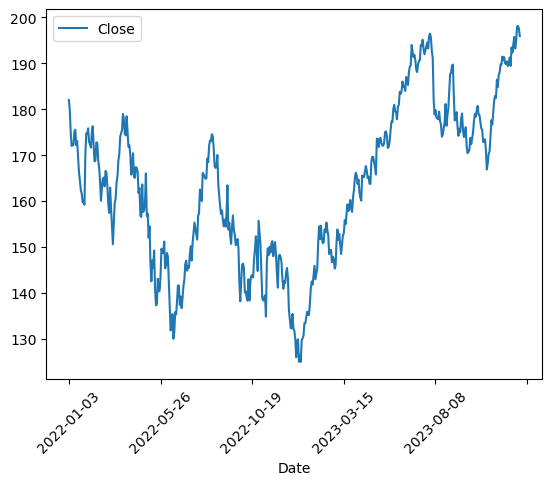

In [49]:
Apple_stock.plot(x="Date", y = "Close")
plt.xticks(rotation=45)

In [50]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

In [51]:
# Exclude the last 10 rows from the dataset
X = Apple_stock[['Open', 'High', 'Low', 'Volume']][:-10]
y = Apple_stock['Close'][:-10]

In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [53]:
#Create the default random forest model
model = RandomForestRegressor()

In [54]:
#Train the model
model.fit(X_train, y_train) #Training the model

RandomForestRegressor()

In [55]:
#Test the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('Training set score:', train_score)
print('Testing set score:', test_score)

Training set score: 0.9989064367983013
Testing set score: 0.9930089510237672


In [56]:
#Make the prediction
new_data = Apple_stock[['Open', 'High', 'Low', 'Volume']].tail(10) #Only want last 10 days
prediction = model.predict(new_data)
print('The model predicts the last 10 days to be:', prediction)
print('Actual value is:', Apple_stock[['Close']].tail(10))

The model predicts the last 10 days to be: [191.82339898 193.08499945 193.81489931 194.01520007 192.03099951
 193.35189873 194.40570266 194.38000259 194.40570266 194.088801  ]
Actual value is:           Close
483  193.419998
484  192.320007
485  194.270004
486  195.710007
487  193.179993
488  194.710007
489  197.960007
490  198.110001
491  197.570007
492  195.889999


In [57]:
last_10_days = Apple_stock.tail(10)
last_10_days


,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
483,2023-12-05,190.210007,194.399994,190.179993,193.419998,193.419998,66628400,AAPL
484,2023-12-06,194.449997,194.759995,192.110001,192.320007,192.320007,41089700,AAPL
485,2023-12-07,193.630005,195.000000,193.589996,194.270004,194.270004,47477700,AAPL
486,2023-12-08,194.199997,195.990005,193.669998,195.710007,195.710007,53377300,AAPL
487,2023-12-11,193.110001,193.490005,191.419998,193.179993,193.179993,60943700,AAPL
488,2023-12-12,193.080002,194.720001,191.720001,194.710007,194.710007,52696900,AAPL
489,2023-12-13,195.089996,198.000000,194.850006,197.960007,197.960007,70404200,AAPL
490,2023-12-14,198.020004,199.619995,196.160004,198.110001,198.110001,66831600,AAPL
491,2023-12-15,197.529999,198.399994,197.000000,197.570007,197.570007,128256700,AAPL
492,2023-12-18,196.089996,196.630005,194.389999,195.889999,195.889999,55751900,AAPL


In [58]:
prediction

array([191.82339898, 193.08499945, 193.81489931, 194.01520007,
       192.03099951, 193.35189873, 194.40570266, 194.38000259,
       194.40570266, 194.088801  ])

In [59]:
# Make predictions for the last 10 days
predicted_last_10_days = model.predict(last_10_days[['Open', 'High', 'Low', 'Volume']])

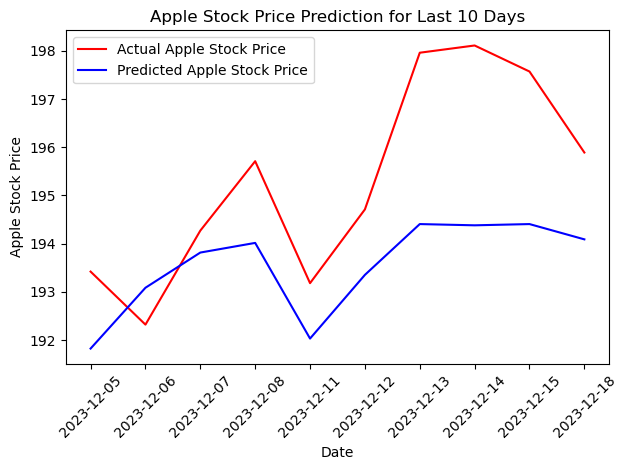

In [64]:
# Extract the "Date" column from last_10_days
dates = last_10_days['Date']

# Plot actual stock price for the last 10 days
plt.plot(dates, last_10_days['Close'], color='red', label="Actual Apple Stock Price")

# Plot predicted stock price for the last 10 days
plt.plot(dates, predicted_last_10_days, color='blue', label="Predicted Apple Stock Price")

# Add title and labels
plt.title('Apple Stock Price Prediction for Last 10 Days')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
# Make predictions on training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [65]:
# Calculate Mean Squared Error
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print('Mean Squared Error on training set:', train_mse)
print('Root Mean Squared Error on testing set:', test_mse)

Mean Squared Error on training set: 0.3038683653107082
Root Mean Squared Error on testing set: 2.0337872921677134
